In [1]:
import numpy as np
import matplotlib.pyplot as plt
import HUXt as H
import astropy.units as u
%matplotlib inline

In [2]:
# Create a the inner boundary solar wind condition (this must be 128 in size)
v_boundary = np.ones(128) * 400 * u.km/u.s
# Add two fast streams
v_boundary[10:20] = v_boundary[10:20] * 2.0
v_boundary[60:80] = v_boundary[60:80] * 2.0

# Get a list of different CMEs to include in the model.
daysec = 86400
cme1 = H.ConeCME(t_launch=0.5*daysec, longitude=0, width=40, v=700, thickness=10)
cme2 = H.ConeCME(t_launch=daysec, longitude=90, width=40, v=1000, thickness=20)
cme_list = [cme1, cme2]

# Set up HUXt to run a simulation for 5 days, and output model data every 4 timesteps (about 35min)
cone_model = H.HUXt2DCME(simtime=5, dt_scale=4)
# Run the model, with a tag to go on output filename
tag = "multi_cme_test"
cone_model.solve_cone_cme(v_boundary, cme_list, save=True, tag=tag) 
# Make an MP4 of the solution with CME
tag = "cone_run"
cone_model.animate('cme', tag)
# Make an MP4 of the solution of ambient wind
tag = 'ambient'
cone_model.animate('ambient', tag)



Moviepy - Building video C:\Users\yq904481\PycharmProjects\HUXt\figures\HUXt2DCME_cone_run_movie.mp4.
Moviepy - Writing video C:\Users\yq904481\PycharmProjects\HUXt\figures\HUXt2DCME_cone_run_movie.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\yq904481\PycharmProjects\HUXt\figures\HUXt2DCME_cone_run_movie.mp4
Moviepy - Building video C:\Users\yq904481\PycharmProjects\HUXt\figures\HUXt2DCME_ambient_movie.mp4.
Moviepy - Writing video C:\Users\yq904481\PycharmProjects\HUXt\figures\HUXt2DCME_ambient_movie.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\yq904481\PycharmProjects\HUXt\figures\HUXt2DCME_ambient_movie.mp4


In [3]:
# Load in the model data we just made
vb, cme, cone_model = H.load_cone_cme_run('C:\\Users\\yq904481\\PycharmProjects\\HUXt\\data\\HUXt2DCME_multi_cme_test.hdf5')

(<Figure size 1008x1008 with 2 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x13ffc28d668>)

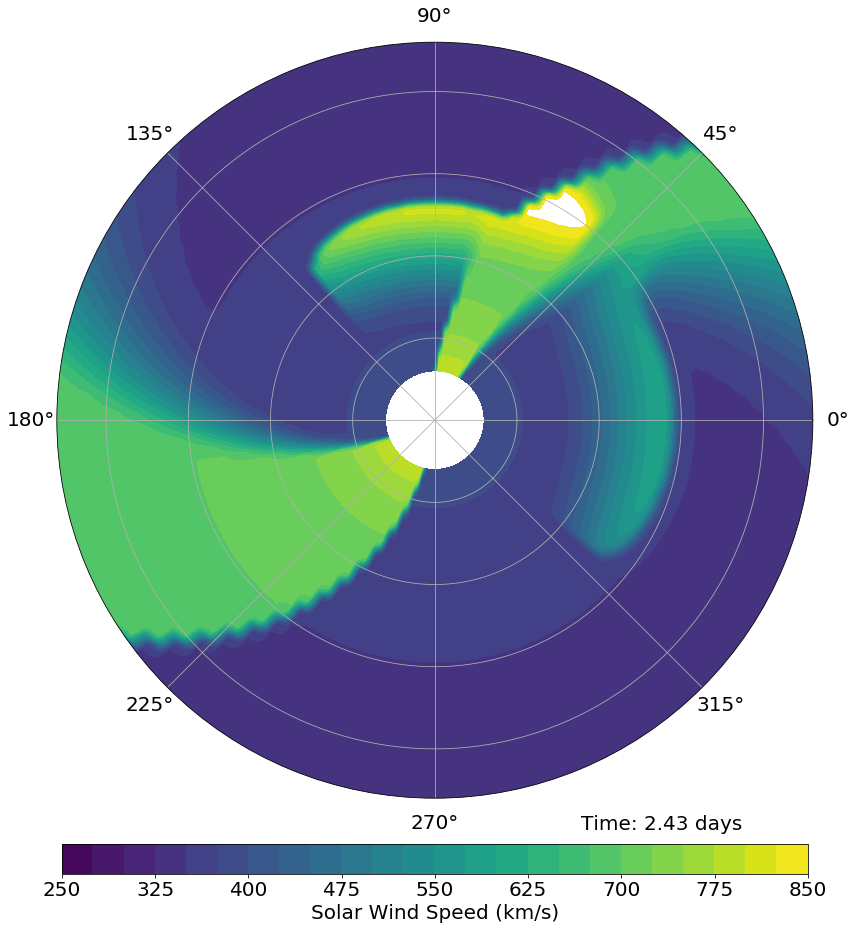

In [9]:
cone_model.plot(50, 'cme')